# Tektronix AFG3000 series arbitrary function generator

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

from qcodes_contrib_drivers.drivers.Tektronix.AFG3000 import AFG3000

In [2]:
afg = AFG3000("AFG", address="TCPIP0::10.0.100.108::inst0::INSTR")

Connected to: TEKTRONIX AFG3252 (serial:C010219, firmware:SCPI:99.0 FV:3.2.4) in 3.94s


In [3]:
afg.print_readable_snapshot(update=True)

AFG:
	parameter              value
--------------------------------------------------------------------------------
IDN                     :	{'vendor': 'TEKTRONIX', 'model': 'AFG3252', 'serial...
am_depth1               :	50 (%)
am_depth2               :	50 (%)
am_internal_efile1      :	"" 
am_internal_efile2      :	"" 
am_internal_freq1       :	10000 (Hz)
am_internal_freq2       :	10000 (Hz)
am_internal_function1   :	SIN 
am_internal_function2   :	SIN 
am_internal_source1     :	INT 
am_internal_source2     :	INT 
am_state1               :	False 
am_state2               :	False 
burst_mode1             :	TRIG 
burst_mode2             :	TRIG 
burst_ncycles1          :	1 
burst_ncycles2          :	5 
burst_state1            :	True 
burst_state2            :	False 
burst_tdelay1           :	0 (s)
burst_tdelay2           :	0 (s)
center_freq1            :	5.5e+05 (Hz)
center_freq2            :	5.5e+05 (Hz)
combine1                :	"" 
combine2                :	"" 
fm_deviation1           

## Upload an arbitrary waveform to the AFG and output it

Note that the waveform data values are in the range 0..1, but the actual voltages output by the AFG depend on the values of the `afg.voltage_low1/2` and `afg.voltage_high1/2` parameters.

Define the waveform we're going to upload. Note that the values of the time axis don't really mean anything; the duration of the waveform is determined by the `afg.freq_cw1/2` parameters (see below).

<IPython.core.display.Javascript object>


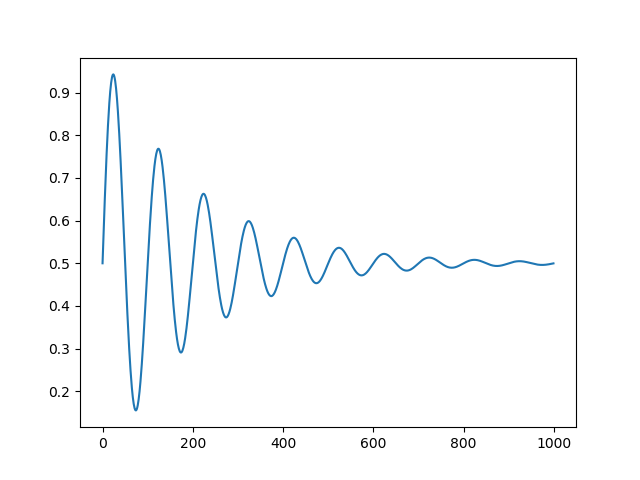

In [4]:
t = np.arange(0, 1000)

wf = np.exp(-t / 200) * np.sin(0.02 * np.pi * t) * 0.5 + 0.5

plt.figure().gca().plot(wf)

Upload the waveform to the memory slot `USER1`.

In [5]:
afg.upload_waveform(wf, memory=1)

Configure the AFG to output the waveform stored in `USER1` on channel 1.

In [6]:
afg.state_output1(1) # enable output on ch1
afg.function_shape1("USER1")
afg.burst_state1(1)  # set the run mode to burst, so we get a pulse on each trigger
afg.trigger_source("TIM") # use internal trigger so we get output continuously

Adjust the timing of the waveform. The `freq_cw1` parameter sets the inverse of the waveform length, while `trigger_timer` sets the repetition rate of the internal trigger.

In [7]:
# set the waveform length to 100 us
afg.freq_cw1(1/100e-6)

In [8]:
# repeat the waveform every 1 ms
afg.trigger_timer(1e-3)

Adjust the range of voltage values.

In [11]:
# the waveform is scaled to +-0.5V (assuming that afg.voltage_limit_low1/high1 are large enough)
afg.voltage_low1(-0.5)
afg.voltage_high1(0.5)

In [10]:
# the waveform is scaled to 0..1V
afg.voltage_low1(0)
afg.voltage_high1(1)

Stop output and disconnect.

In [13]:
afg.state_output1(0)

In [14]:
afg.close()